In [26]:
#Authors: Tlachac, et al
#Paper: "Automated Construction of Lexicons to Improve Depression Screening with Text Messages"

import pandas as pd
import matplotlib.pyplot as plt

lexcats = ["Fiction1c", "Fiction1f", "Fiction1r",
           "Fiction3c", "Fiction3f", "Fiction3r",
           "Fiction5c", "Fiction5f", "Fiction5r",
           "Reddit1c", "Reddit1f", "Reddit1r",
           "Reddit3c", "Reddit3f", "Reddit3r",
           "Reddit5c", "Reddit5f", "Reddit5r",
           "News1c", "News1f", "News1r",
           "News3c", "News3f", "News3r",
           "News5c", "News5f", "News5r"]

In [55]:
#counts = []
newdf = pd.DataFrame()

df = pd.read_csv("categories.tsv", header = None)
df.columns = ["words"]
c = []
for i in range(0, df.shape[0]):
    c.append(len(df["words"][i].split("\t")))
newdf["Default"] = c

for lex in lexcats:
    data = pd.read_csv("words" + lex + ".csv")
    
    c = []
    for i in range(0, data.shape[0]):
        c.append(len(data["words"][i].split(" ")))
    
    #counts.append(c)
    newdf[lex] = c
    

In [58]:
#newdf = pd.DataFrame()
#newdf["Lexicons"] = lexcats
#newdf["Counts"] = counts
newdf = newdf[newdf.columns[::-1]]
newdf.head()

,News5r,News5f,News5c,News3r,News3f,News3c,News1r,News1f,News1c,Reddit5r,...,Fiction5r,Fiction5f,Fiction5c,Fiction3r,Fiction3f,Fiction3c,Fiction1r,Fiction1f,Fiction1c,Default
0,22,5,5,5,7,6,7,8,27,45,...,60,47,47,60,44,47,61,60,35,60
1,13,86,86,17,90,90,33,9,9,79,...,94,88,88,83,88,88,90,88,88,91
2,90,87,87,84,83,83,26,86,79,77,...,47,81,81,81,81,81,86,77,32,86
3,111,10,9,56,101,8,92,4,92,106,...,84,101,103,104,51,101,104,72,105,108
4,95,96,13,5,4,75,96,12,25,89,...,96,95,96,94,94,96,92,24,94,96


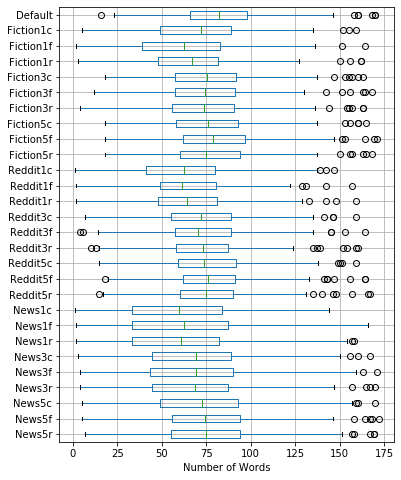

In [61]:
plt.figure(figsize = (6, 8))
newdf.boxplot(vert=False)
plt.xlabel("Number of Words")
plt.savefig("nwords.png")
plt.show()